### Marcos Well
https://www.linkedin.com/in/marcoswell/
<br>
https://github.com/marcoswell

## Criando uma carteira de ativos usando:
*  indice Sharpe 
* K-MEANS 
* Teoria Moderna do Portfólio - Markowitz

## Bibliotecas

In [1]:
%matplotlib inline 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import random
import investpy
import yfinance as yf
from sklearn.cluster import KMeans
import pandas_datareader.data as web
import plotly
import cufflinks
import cvxopt as opt
from cvxopt import blas, solvers


import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , precision_score , accuracy_score , precision_recall_curve
from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold
from sklearn.decomposition import PCA
from sklearn import datasets
import time

# 1 - Baixando e Tratando os dados 

In [38]:
#Para este código irie pegar as açõe com o maior volume da B3
#Essas são as ações da B3 com o maior volume
symbols = ['SHOW3', 'CYRE3', 'ARZZ3', 'ROMI3', 'TIMS3', 'AALR3', 'ENEV3',
           'RADL3', 'DMMO3', 'POMO4', 'VLID3', 'ALUP11', 'PETR4', 'BEEF3',
           'UGPA3', 'EQTL3', 'SUZB3', 'ABCB4','GOLL4', 'SQIA3', 'GSHP3', 
           'LREN3', 'CSAN3','AZUL4', 'VULC3', 'BRAP3', 'ITUB3', 'SEER3','BRFS3',
           'GOAU3', 'LOGN3'] 
symbols=[sy+".SA" for sy in symbols[:-1]]

### Baixando os dados para a base de treinamento 

In [39]:
start_date = "2018-03-05"
end_date = "2021-10-09"

# BAIXANDO AS AÇÕES  

df = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [40]:
df.head()

,AALR3.SA,ABCB4.SA,ALUP11.SA,ARZZ3.SA,AZUL4.SA,BEEF3.SA,BRAP3.SA,BRFS3.SA,CSAN3.SA,CYRE3.SA,...,RADL3.SA,ROMI3.SA,SEER3.SA,SHOW3.SA,SQIA3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,VLID3.SA,VULC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-05,15.740197,14.286633,15.224218,50.011364,33.180000,7.677809,14.440759,24.750000,9.511870,11.401792,...,14.995100,5.128492,26.011938,8.785451,7.084284,19.597193,11.825179,33.147728,17.923401,9.267655
2018-03-06,16.096581,14.128060,15.266960,49.830162,33.700001,7.182466,14.134596,24.139999,9.602894,11.372444,...,14.782526,4.886582,26.178680,9.207460,7.005929,19.807617,11.783278,33.184303,17.140339,9.186597
2018-03-07,15.839192,14.060099,15.215672,48.199356,33.400002,7.083398,14.119287,25.160000,9.566050,11.306411,...,15.259382,5.007537,25.553389,9.869246,6.958726,20.091238,12.168789,33.339752,16.418182,9.447784
2018-03-08,15.819393,14.158264,15.198577,47.112152,35.000000,7.149445,13.711067,25.030001,9.438184,11.049614,...,15.090855,5.031728,25.336624,9.955565,7.229523,20.823158,12.110124,33.248314,16.714005,9.438778
2018-03-09,16.284670,14.482960,15.172931,48.335262,36.500000,7.281535,14.022335,26.559999,9.782770,11.203693,...,15.282363,5.007537,25.445007,9.687016,7.115242,21.170824,12.269359,33.961555,16.879318,9.573875


### 2 - Baixando os dados para o teste 

In [41]:
start_date2 = "2021-03-08"
end_date2 = "2022-10-09"


# BAIXANDO AS AÇÕES  PARA O TESTE

df_teste = yf.download(symbols, start=start_date2, end=end_date2)['Adj Close']

[*********************100%***********************]  30 of 30 completed


## Arrumando ativos com NA 

In [42]:
df1  = df.dropna(axis=0)
df1_teste  = df_teste.dropna(axis=0) 

In [46]:
# Verificando se sobrou algum NA 
df1.isnull().sum()

,AALR3.SA,ABCB4.SA,ALUP11.SA,ARZZ3.SA,AZUL4.SA,BEEF3.SA,BRAP3.SA,BRFS3.SA,CSAN3.SA,CYRE3.SA,...,RADL3.SA,ROMI3.SA,SEER3.SA,SHOW3.SA,SQIA3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,VLID3.SA,VULC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-05,15.740197,14.286633,15.224218,50.011364,33.180000,7.677809,14.440759,24.750000,9.511870,11.401792,...,14.995100,5.128492,26.011938,8.785451,7.084284,19.597193,11.825179,33.147728,17.923401,9.267655
2018-03-06,16.096581,14.128060,15.266960,49.830162,33.700001,7.182466,14.134596,24.139999,9.602894,11.372444,...,14.782526,4.886582,26.178680,9.207460,7.005929,19.807617,11.783278,33.184303,17.140339,9.186597
2018-03-07,15.839192,14.060099,15.215672,48.199356,33.400002,7.083398,14.119287,25.160000,9.566050,11.306411,...,15.259382,5.007537,25.553389,9.869246,6.958726,20.091238,12.168789,33.339752,16.418182,9.447784
2018-03-08,15.819393,14.158264,15.198577,47.112152,35.000000,7.149445,13.711067,25.030001,9.438184,11.049614,...,15.090855,5.031728,25.336624,9.955565,7.229523,20.823158,12.110124,33.248314,16.714005,9.438778
2018-03-09,16.284670,14.482960,15.172931,48.335262,36.500000,7.281535,14.022335,26.559999,9.782770,11.203693,...,15.282363,5.007537,25.445007,9.687016,7.115242,21.170824,12.269359,33.961555,16.879318,9.573875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-04,11.690000,14.183028,22.773449,77.537888,36.959999,9.837223,33.746685,26.870001,22.004091,17.270981,...,21.817051,15.731189,11.335636,5.010000,20.678705,48.215591,10.928328,14.095476,7.854556,9.923564
2021-10-05,11.800000,14.246999,22.573009,76.453712,36.250000,10.041200,33.229679,27.120001,21.759289,16.847624,...,21.885784,15.332824,11.137980,4.910000,19.573051,47.304272,10.956446,14.085894,7.931750,9.549089
2021-10-06,12.200000,13.936288,22.496653,76.424660,35.669998,10.087559,33.442150,26.780001,21.599224,16.828381,...,22.150887,15.502341,11.207159,4.700000,18.895714,46.684196,10.853349,13.721768,7.661569,8.987379


## 3 - Indice Sharpe

In [47]:
# Criando Variaveis 
r_acoes = df1.pct_change() # retornos diarios
retorno_anual = r_acoes.mean() * 252  # retornos anual
variancia_anual = r_acoes.var() * 252 # variancia anual 

In [48]:
# Adicionando colunas ao Data Frame 
df2 = pd.DataFrame(df1.columns, columns=['Symbols'])
df2['Variances'] = variancia_anual.values
df2['Returns'] = retorno_anual.values

In [49]:
# Calculo do Indice Sharpe

rf = 0.06 # risco 

indice_sharpe = ( retorno_anual - rf )/ variancia_anual

In [50]:
# Ordenando o indice Sharpe do maior para o menor
indice_sharpe.sort_values(ascending=False).head(6)

ENEV3.SA     3.284946
EQTL3.SA     1.616622
BRAP3.SA     1.559059
CSAN3.SA     1.528120
SQIA3.SA     1.440756
ALUP11.SA    1.429770
dtype: float64

In [51]:
# Adicionando o indice sharpe ao Data Frame 
df2['Sharpe'] = indice_sharpe.values
df2_filtrado  = df2.dropna(axis = 0) # limpando os dados
df2_filtrado.head(6)

,Symbols,Variances,Returns,Sharpe
0,AALR3.SA,0.239971,0.061473,0.006139
1,ABCB4.SA,0.122363,0.072524,0.102354
2,ALUP11.SA,0.064976,0.152900,1.429770
3,ARZZ3.SA,0.180523,0.228044,0.930870
4,AZUL4.SA,0.479120,0.271166,0.440738
5,BEEF3.SA,0.222711,0.193213,0.598145


# K-Means
### A valiando o número de Clusters necessários
## Elbow Method

In [52]:
min_c = 2 
max_c = 16
inertia_list = np.zeros(shape = (max_c - min_c + 1,))
X = df2_filtrado[['Returns','Variances','Sharpe']].values

In [53]:
for i in range(min_c , max_c ):
    km = KMeans(n_clusters = i )
    km.fit(X)
    inertia_list[i- min_c] = km.inertia_

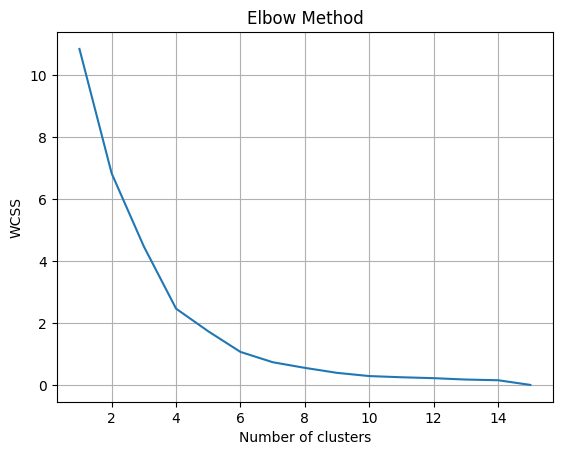

In [54]:
plt.plot(range(1, 16), inertia_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [55]:
kmodel = KMeans(n_clusters = 4).fit(X) # Treinando o modelo
labels = kmodel.labels_
labels # array contendo o cluster de cada aativo

array([0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 3, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0], dtype=int32)

In [59]:
# Adicionando a coluna 'Cluster' = mostra em qual Clusters cada ativo está 
df2_filtrado['Cluster'] = labels
df2_filtrado.head(3)

,Symbols,Variances,Returns,Sharpe,Cluster
0,AALR3.SA,0.239971,0.061473,0.006139,0
1,ABCB4.SA,0.122363,0.072524,0.102354,0
2,ALUP11.SA,0.064976,0.152900,1.429770,2


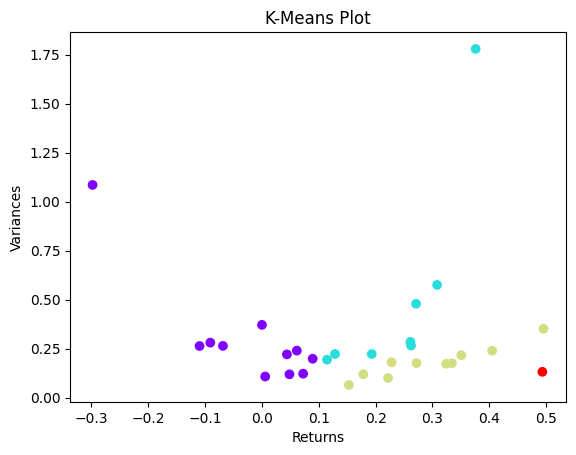

In [57]:
# Mostrando os Clusters
plt.scatter(X[:,0], X[:,1], c = labels , cmap = 'rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')

plt.show()

In [58]:
# Ordenando o Data Frame pelo Indice Sharpe do maior para o menor
acoes1 = df2_filtrado.sort_values(by = ['Sharpe'] , ascending=False )
acoes1.head(60)

,Symbols,Variances,Returns,Sharpe,Cluster
11,ENEV3.SA,0.131918,0.493342,3.284946,3
12,EQTL3.SA,0.100128,0.221869,1.616622,2
6,BRAP3.SA,0.175906,0.334249,1.559059,2
8,CSAN3.SA,0.172810,0.324074,1.528120,2
24,SQIA3.SA,0.239485,0.405039,1.440756,2
2,ALUP11.SA,0.064976,0.152900,1.429770,2
25,SUZB3.SA,0.216653,0.350808,1.342276,2
21,ROMI3.SA,0.351643,0.495248,1.237756,2
13,GOAU3.SA,0.176279,0.271983,1.202541,2
20,RADL3.SA,0.119635,0.178377,0.989484,2


In [77]:
# Foram escolhidas a ação com maior Indice Sharpe de cada Cluster
# Ações escolhidas para serem clusters

folio_retornos = r_acoes[['ENEV3.SA','EQTL3.SA','PETR4.SA','VULC3.SA']]
folio_acoes =  df1[['ENEV3.SA','EQTL3.SA','PETR4.SA','VULC3.SA']]

portifolio_retornos  = folio_retornos.dropna(axis = 0) # limpando e passando os valores 
portifolio_acoes  = folio_acoes.dropna(axis = 0)       # limpando e passando os valores

In [78]:
portifolio_retornos.dropna(axis = 0) # limpando 

,ENEV3.SA,EQTL3.SA,PETR4.SA,VULC3.SA
Date,,,,
2018-03-06,-0.006642,-0.006038,-0.009946,-0.008746
2018-03-07,0.006686,0.003728,-0.010502,0.028431
2018-03-08,-0.003690,0.004127,0.001384,-0.000953
2018-03-09,0.005185,-0.017808,0.031797,0.014313
2018-03-12,-0.002948,0.011158,-0.002680,0.001881
...,...,...,...,...
2021-10-04,-0.057541,-0.030433,0.028214,-0.015785
2021-10-05,-0.025707,-0.016499,0.021883,-0.037736
2021-10-06,-0.017150,-0.011866,-0.026513,-0.058823


## 4 - Criando Portfolio com Markowitz

In [79]:
# retornos
r_acao = portifolio_acoes.pct_change() # retornos diarios
ind_er = portifolio_retornos.mean() * 252 # retorno anual 
ann_sd = portifolio_retornos.var() * 252 #  variancia anual
cov_matrix = portifolio_acoes.pct_change().apply(lambda x: np.log(1+x)).cov()

In [80]:
df_açoes = pd.DataFrame(portifolio_acoes.columns, columns=['Symbols'])
df_açoes['Variances'] = ann_sd.values
df_açoes['Returns'] = ind_er.values

In [81]:
ann_sd

ENEV3.SA    0.131918
EQTL3.SA    0.100128
PETR4.SA    0.265986
VULC3.SA    0.198551
dtype: float64

In [82]:
# 'Returns','Variances' - De cada portifolio criado
assets = df2_filtrado[['Returns','Variances']] 
assets.head()

,Returns,Variances
0,0.061473,0.239971
1,0.072524,0.122363
2,0.152900,0.064976
3,0.228044,0.180523
4,0.271166,0.479120


In [85]:
p_ret = [] # Definindo um array vazio para os retornos do portfolio
p_vol = [] # Definido um array vazio para a volatilidade do portfolio
p_weights = [] # Definido um array vazio para os pesos do portfolio

num_assets = len(portifolio_acoes.columns)
num_portfolios = 30000 # Tamanho do portfolio

In [86]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)          # Retornos - é o produto indidual esperado dos retornos e pesos 
    returns = np.dot(weights, ind_er) #  Retornos - é o produto indidual esperado dos retornos e pesos 
                                       
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variancia
    sd = np.sqrt(var) # Desvio padrão diário
    ann_sd = sd*np.sqrt(250) # Desvio padrão anual = volatilidade
    p_vol.append(ann_sd)
    data = {'Returns':p_ret, 'Volatility':p_vol}

In [87]:
for counter, symbol in enumerate(portifolio_acoes.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [88]:
portfolios  = pd.DataFrame(data) # Data Frame com os portifolios criados
portfolios.head()

,Returns,Volatility,ENEV3.SA weight,EQTL3.SA weight,PETR4.SA weight,VULC3.SA weight
0,0.268721,0.345322,0.130521,0.386408,0.435992,0.047079
1,0.200713,0.338727,0.097270,0.243605,0.230024,0.429100
2,0.274903,0.310475,0.304951,0.254181,0.165764,0.275104
3,0.299274,0.387649,0.274926,0.024139,0.552888,0.148047
4,0.255807,0.302906,0.239899,0.367248,0.120693,0.272161


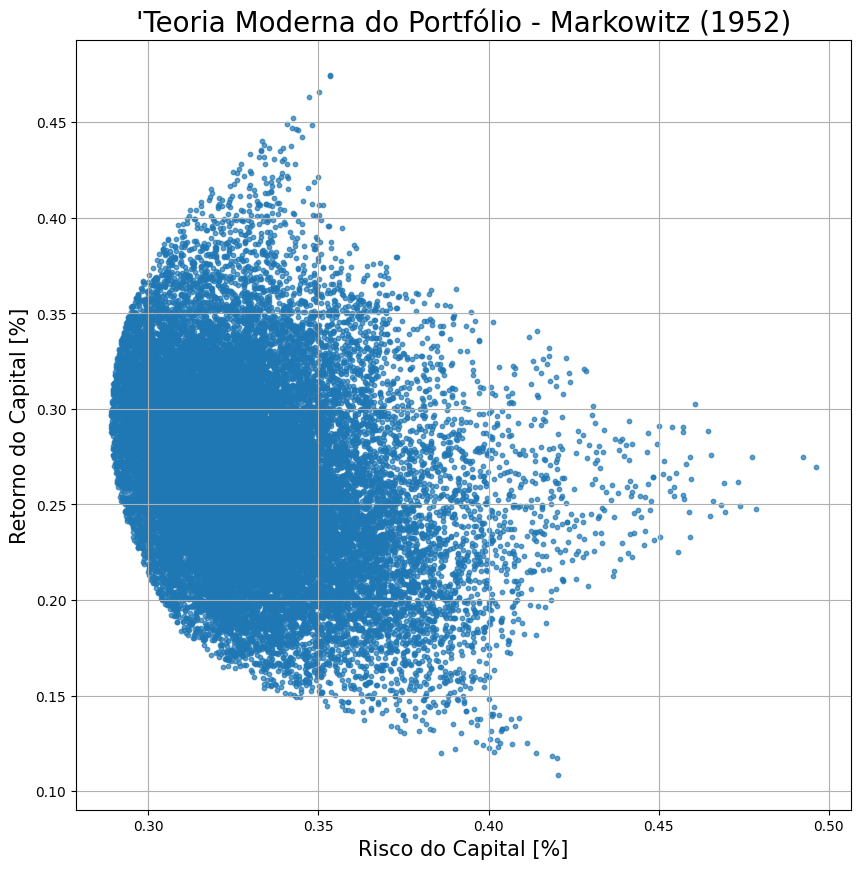

In [89]:
# Fronteira de eficiencia 
portfolios.plot.scatter(x='Volatility' , y='Returns', marker='o',
                        s=10,alpha=0.7, grid=True, figsize=[10,10])
plt.xlabel("Risco do Capital [%]",fontsize=15)
plt.ylabel('Retorno do Capital [%]',fontsize=15)
plt.title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20) 
plt.show()

##  5 - Analisando os n-portifolios criados 

#### Portifolio de menor volatilidade 

In [90]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()] # idxmin()  da o menor valor na coluna especificada
min_vol_port # mostra o portifolio de menor volatilidade e os pesos(weight) dos ativos em tal portifolio

Returns            0.287908
Volatility         0.289099
ENEV3.SA weight    0.293909
EQTL3.SA weight    0.574466
PETR4.SA weight    0.021367
VULC3.SA weight    0.110257
Name: 14500, dtype: float64

#### O portifolio Sharpe - Aquele com o maior Indice Sharpe

In [91]:
rf = 0.06 # risco 

optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]

optimal_risky_port

Returns            0.474926
Volatility         0.353422
ENEV3.SA weight    0.935158
EQTL3.SA weight    0.056480
PETR4.SA weight    0.001708
VULC3.SA weight    0.006654
Name: 27965, dtype: float64

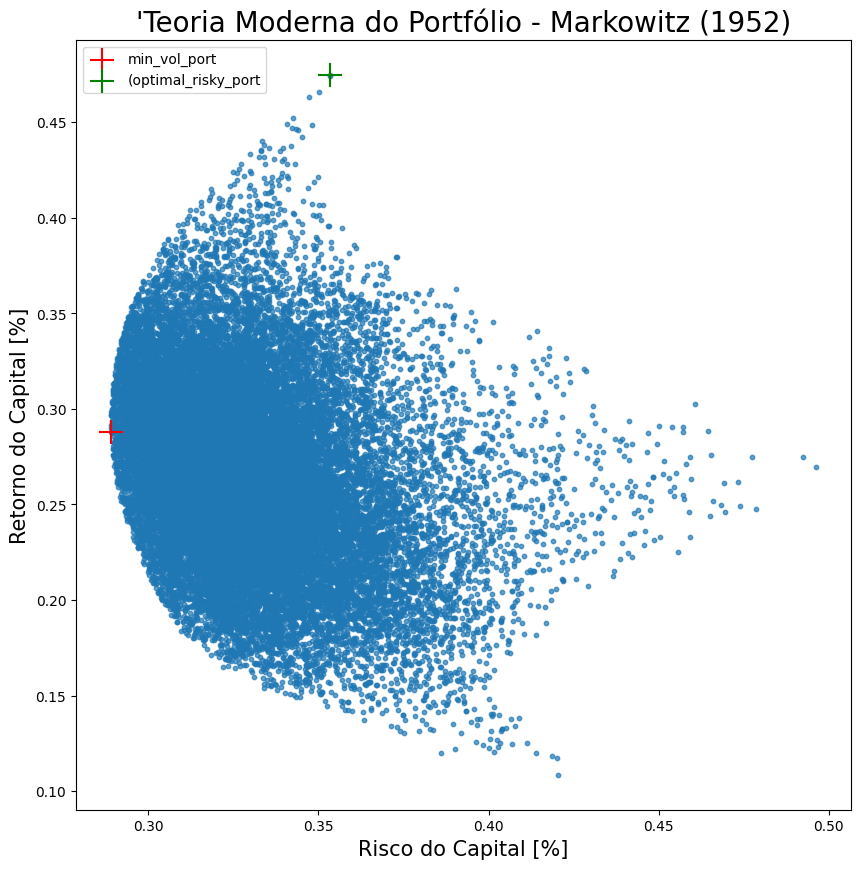

In [92]:
plt.subplots(figsize=(10,10))
plt.xlabel("Risco do Capital [%]",fontsize=15)
plt.ylabel('Retorno do Capital [%]',fontsize=15)
plt.title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20) 
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o',s=10,alpha=0.7 )
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='+', s=300 , label = 'min_vol_port')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='+', s=300 , label = '(optimal_risky_port')
plt.legend(loc='upper left')
plt.show()

# Analisando o retorno das açoes do portifolio

####   Analisando o retorno das carteiras criadas no ultimo ano 
####   BUY & HOLD 

In [94]:
# Retorno acumulado do ultimo ano dos ativos do portifolio
# Usando os dados do ultimo ano 
portifolio_retornos_teste = df1_teste.pct_change()
r =  portifolio_retornos_teste[['ENEV3.SA','EQTL3.SA','PETR4.SA','VULC3.SA']]
r.head()

,ENEV3.SA,EQTL3.SA,PETR4.SA,VULC3.SA
Date,,,,
2021-03-08,NaN,NaN,NaN,NaN
2021-03-09,0.030104,0.000486,0.023223,-0.011004
2021-03-10,0.013574,0.017484,0.034738,0.030598
2021-03-11,0.050890,0.008592,0.042525,0.000000
2021-03-12,0.015892,0.002840,-0.005153,0.012146


In [95]:
# Carteiras criadas , descomente para analisar a carteira 


min_vol_port

Returns            0.287908
Volatility         0.289099
ENEV3.SA weight    0.293909
EQTL3.SA weight    0.574466
PETR4.SA weight    0.021367
VULC3.SA weight    0.110257
Name: 14500, dtype: float64

In [96]:
optimal_risky_port

Returns            0.474926
Volatility         0.353422
ENEV3.SA weight    0.935158
EQTL3.SA weight    0.056480
PETR4.SA weight    0.001708
VULC3.SA weight    0.006654
Name: 27965, dtype: float64

In [97]:
# Pesos da carteira 
w  = [0.935158 , 0.056480 , 0.001708 , 0.006654 ]  # optimal_risky_port
w2 = [ 0.293909 , 0.574466 , 0.021367, 0.110257 ] # min_vol_port

# Retornos do Portfolio
R = np.dot(r,w)
pd.DataFrame(R,columns = ['R'])

R2 = np.dot(r,w2)
pd.DataFrame(R2,columns = ['R2'])

,R2
0,NaN
1,0.008410
2,0.018150
3,0.020801
4,0.007531
...,...
394,0.048077
395,-0.017416
396,0.003302
397,-0.008153


## Visualisando os retornos do portifolio

In [98]:
reais = 100.000

retorno_cumulativo_carteira = np.cumprod(R[1:] + 1)-1
retorno_carteira = retorno_cumulativo_carteira[-1]*100
retorno_em_reais = (reais*(1+R[1:]).cumprod() - reais)*1000

print("Carteira: optimal_risky_port" )
print("Retorno acumulado da carteira no perído: ", round(retorno_carteira,2), "%")
print("Lucro/Prejuizo acumulado da carteira no perído em reais $",round( retorno_em_reais[-1] , 2))
print("-------------------------------------------------------------------------------------------------")

retorno_cumulativo_carteira2 = np.cumprod(R2[1:] + 1)-1
retorno_carteira2 = retorno_cumulativo_carteira2[-1]*100
retorno_em_reais2 = (reais*(1+R2[1:]).cumprod() - reais)*1000
print("Carteira: min_vol_port" )
print("Retorno acumulado da carteira no perído: ", round(retorno_carteira2,2), "%")
print("Lucro/Prejuizo acumulado da carteira no perído em reais $",round( retorno_em_reais2[-1] , 2))

Carteira: optimal_risky_port
Retorno acumulado da carteira no perído:  -7.02 %
Lucro/Prejuizo acumulado da carteira no perído em reais $ -7021.74
-------------------------------------------------------------------------------------------------
Carteira: min_vol_port
Retorno acumulado da carteira no perído:  36.48 %
Lucro/Prejuizo acumulado da carteira no perído em reais $ 36482.9


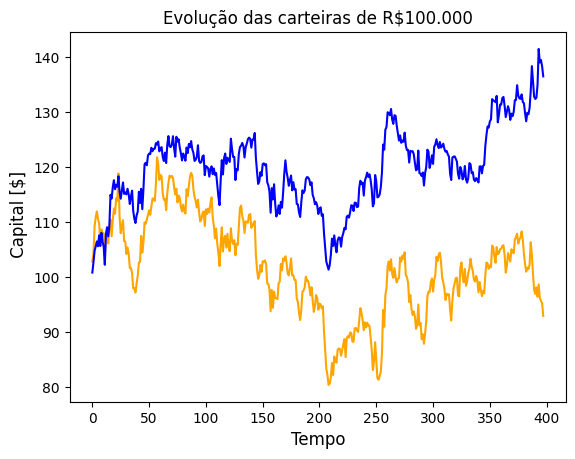

In [103]:
plt.plot(reais*(1+R[1:]).cumprod(), color = 'orange') # optimal_risky_port
plt.plot(reais*(1+R2[1:]).cumprod(), color = 'blue')  # min_vol_port
plt.title('Evolução das carteiras de R$100.000')
plt.ylabel(" Capital [$]",fontsize=12)
plt.xlabel('Tempo',fontsize=12)
plt.show()

Explicação
## Escolhas de ativos:
Devido a melhor relação de lucro e risco e analisando o método elbow foi escolhido apenas 4 ações para compor a carteira.
## Resultado: 
Podemos observar que o gráfico dos portifólios tende para uma certa área devido a pandemia, afetando o risco sistemático da carteira. Porém, com a alocação da carteira tendendo para uma ação que teve um bom lucro foi possivel mitigar a perda dos outros.

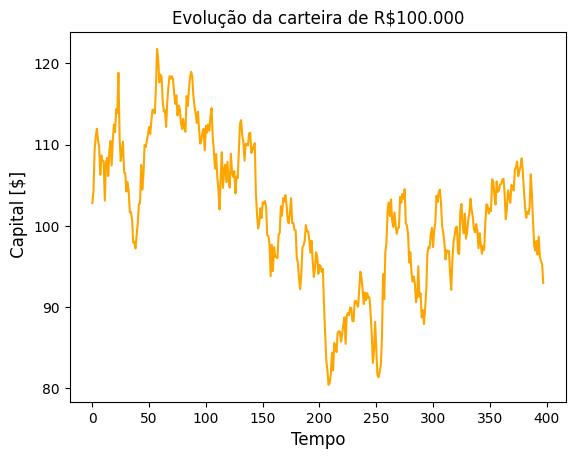

In [100]:
plt.plot(reais*(1+R[1:]).cumprod(), color = 'orange') # optimal_risky_port
plt.title('Evolução da carteira de R$100.000')
plt.ylabel(" Capital [$]",fontsize=12)
plt.xlabel('Tempo',fontsize=12)
plt.show()

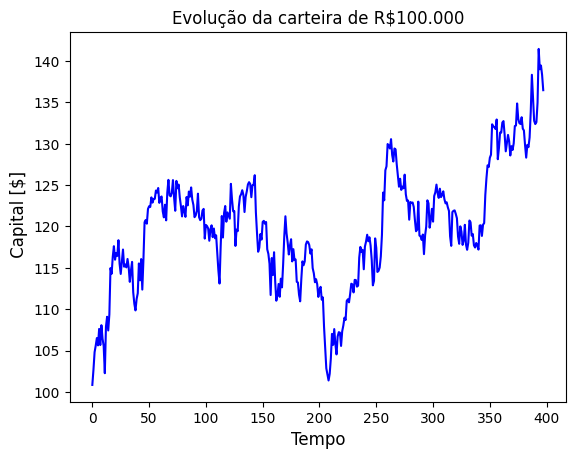

In [101]:
plt.plot(reais*(1+R2[1:]).cumprod(), color = 'blue') # min_vol_port
plt.title('Evolução da carteira de R$100.000')
plt.ylabel(" Capital [$]",fontsize=12)
plt.xlabel('Tempo',fontsize=12)
plt.show()